In [151]:
import pandas as pd
import numpy as np
import urllib.request
import unidecode
import matplotlib.pyplot as plt

In [152]:
data_wiatrak_120_1 = pd.read_excel('workdir/dane_wiatraki/Gaj5.xlsx', sheet_name = '1250164')
data_wiatrak_120_2 = pd.read_excel('workdir/dane_wiatraki/Gaj5.xlsx', sheet_name = '1250165')
data_wiatrak_120_3 = pd.read_excel('workdir/dane_wiatraki/Gaj6.xlsx', sheet_name = '1250166')
data_wiatrak_120_4 = pd.read_excel('workdir/dane_wiatraki/Gaj6.xlsx', sheet_name = '1250167')
data_wiatrak_120 = [data_wiatrak_120_1,data_wiatrak_120_2,data_wiatrak_120_3,data_wiatrak_120_4]
data_wiatrak_140_1 = pd.read_excel('workdir/dane_wiatraki/Gaj5.xlsx', sheet_name = '1150123')
data_wiatrak_140_2 = pd.read_excel('workdir/dane_wiatraki/Gaj6.xlsx', sheet_name = '1150124')
data_wiatrak_140 = [data_wiatrak_140_1, data_wiatrak_140_2]
data_wiatrak_70_1 = pd.read_excel('workdir/dane_wiatraki/Gaj3_2.xlsx', sheet_name = '531417')
data_wiatrak_70_2 = pd.read_excel('workdir/dane_wiatraki/Gaj3_2.xlsx', sheet_name = '531418')
data_wiatrak_70_3 = pd.read_excel('workdir/dane_wiatraki/Gaj3_2.xlsx', sheet_name = '531419')
data_wiatrak_70_4 = pd.read_excel('workdir/dane_wiatraki/Gaj3_2.xlsx', sheet_name = '481931')
data_wiatrak_70 = [data_wiatrak_70_1,data_wiatrak_70_2,data_wiatrak_70_3,data_wiatrak_70_4]

In [153]:
for i, df in enumerate(data_wiatrak_120):
    data_wiatrak_120[i] = df.iloc[::6,:]
for i, df in enumerate(data_wiatrak_140):
    data_wiatrak_140[i] = df.iloc[::6,:]
for i, df in enumerate(data_wiatrak_70):
    data_wiatrak_70[i] = df.iloc[::6,:]


In [154]:
imgw = pd.read_csv('workdir/dane_wiatraki/s_t_07_2022.csv', header=None)

d:\Programy\Anaconda\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (6,34,56) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [155]:
imgw

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,349190600,BIELSKO-BIA�A,2022,7,1,0,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
1,349190600,BIELSKO-BIA�A,2022,7,1,1,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
2,349190600,BIELSKO-BIA�A,2022,7,1,2,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
3,349190600,BIELSKO-BIA�A,2022,7,1,3,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
4,349190600,BIELSKO-BIA�A,2022,7,1,4,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43124,354220195,SUWA�KI,2022,7,31,19,1.0,NaN,80,NaN,...,0,8,0,8,NaN,NaN,0,8,0,8
43125,354220195,SUWA�KI,2022,7,31,20,1.0,NaN,80,NaN,...,0,8,0,8,NaN,NaN,0,8,0,8
43126,354220195,SUWA�KI,2022,7,31,21,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
43127,354220195,SUWA�KI,2022,7,31,22,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8


In [156]:
with urllib.request.urlopen('https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/terminowe/synop/s_t_format.txt') as file:
    lines = file.readlines()
lines = lines[1:-22]
columns = []
for line in lines:
    columns.append(' '.join(line.decode("utf-8", "ignore").split()[:-1]))
    # columns.append(' '.join(line.decode().split()[:-1]))

In [157]:
columns

['Kod stacji',
 'Nazwa stacji',
 'Rok',
 'Miesic',
 'Dzie',
 'Godzina',
 'Wysoko podstawy chmur CL CM szyfrowana [kod]',
 'Status pomiaru HPOD',
 'Wysoko podstawy niszej [m]',
 'Status pomiaru HPON',
 'Wysoko podstawy wyszej [m]',
 'Status pomiaru HPOW',
 'Wysoko podstawy tekstowy [opis]',
 'Pomiar przyrzadem 1 (nisza) [P]',
 'Pomiar przyrzadem 2 (wysza) [P]',
 'Widzialno [kod]',
 'Status pomiaru WID',
 'Widzialno operatora [m]',
 'Status pomiaru WIDO',
 'Widzialno automat [m]',
 'Status pomiaru WIDA',
 'Zachmurzenie oglne [oktanty]',
 'Status pomiaru NOG',
 'Kierunek wiatru []',
 'Status pomiaru KRWR',
 'Prdko wiatru [m/s]',
 'Status pomiaru FWR',
 'Poryw wiatru [m/s]',
 'Status pomiaru PORW',
 'Temperatura powietrza [C]',
 'Status pomiaru TEMP',
 'Temperatura termometru zwilonego [C]',
 'Status pomiaru TTZW',
 'Wskanik wentylacji [W/N]',
 'Wskanik lodu [L/W]',
 'Cinienie pary wodnej [hPa]',
 'Status pomiaru CPW',
 'Wilgotno wzgldna [%]',
 'Status pomiaru WLGW',
 'Temperatura punktu r

In [158]:
imgw.columns = columns

In [159]:
imgw

,Kod stacji,Nazwa stacji,Rok,Miesic,Dzie,Godzina,Wysoko podstawy chmur CL CM szyfrowana [kod],Status pomiaru HPOD,Wysoko podstawy niszej [m],Status pomiaru HPON,...,Wysoko wieo spadego niegu [cm],Status pomiaru HSS,Wysoko niegu na poletku [cm],Status pomiaru GRSN,Gatunek niegu [kod],Uksztatowanie pokrywy [kod],Wysoko prbki [cm],Status pomiaru HPRO,Ciar prbki [g],Status pomiaru CIPR
0,349190600,BIELSKO-BIA�A,2022,7,1,0,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
1,349190600,BIELSKO-BIA�A,2022,7,1,1,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
2,349190600,BIELSKO-BIA�A,2022,7,1,2,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
3,349190600,BIELSKO-BIA�A,2022,7,1,3,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
4,349190600,BIELSKO-BIA�A,2022,7,1,4,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43124,354220195,SUWA�KI,2022,7,31,19,1.0,NaN,80,NaN,...,0,8,0,8,NaN,NaN,0,8,0,8
43125,354220195,SUWA�KI,2022,7,31,20,1.0,NaN,80,NaN,...,0,8,0,8,NaN,NaN,0,8,0,8
43126,354220195,SUWA�KI,2022,7,31,21,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
43127,354220195,SUWA�KI,2022,7,31,22,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8


In [160]:
imgw['Nazwa stacji'] = imgw['Nazwa stacji'].apply(unidecode.unidecode)

In [161]:
imgw = imgw[["Nazwa stacji","Rok","Miesic","Dzie","Godzina","Temperatura powietrza [C]", "Temperatura punktu rosy [C]","Cinienie na pozimie morza [hPa]","Opad za 6 godzin [mm]"]]

In [162]:
imgw["Opad [m]"] = imgw["Opad za 6 godzin [mm]"]/6/1000
imgw.pop("Opad za 6 godzin [mm]")

C:\Users\48782\AppData\Local\Temp/ipykernel_9920/632630318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imgw["Opad [m]"] = imgw["Opad za 6 godzin [mm]"]/6/1000


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
43124    0.0
43125    0.0
43126    0.0
43127    0.0
43128    0.0
Name: Opad za 6 godzin [mm], Length: 43129, dtype: float64

In [163]:
imgw["Temperatura powietrza [K]"] = imgw["Temperatura powietrza [C]"]+273.15
imgw.pop("Temperatura powietrza [C]")
imgw["Temperatura punktu rosy [K]"] = imgw["Temperatura punktu rosy [C]"]+273.15
imgw.pop("Temperatura punktu rosy [C]")

C:\Users\48782\AppData\Local\Temp/ipykernel_9920/3660470806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imgw["Temperatura powietrza [K]"] = imgw["Temperatura powietrza [C]"]+273.15
C:\Users\48782\AppData\Local\Temp/ipykernel_9920/3660470806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imgw["Temperatura punktu rosy [K]"] = imgw["Temperatura punktu rosy [C]"]+273.15


0        16.8
1        16.2
2        15.1
3        15.5
4        15.6
         ... 
43124    15.2
43125    15.3
43126    15.2
43127    15.0
43128    14.7
Name: Temperatura punktu rosy [C], Length: 43129, dtype: float64

In [164]:
imgw["Cinienie na pozimie morza [Pa]"] = imgw["Cinienie na pozimie morza [hPa]"]*100
imgw.pop("Cinienie na pozimie morza [hPa]")

C:\Users\48782\AppData\Local\Temp/ipykernel_9920/3888918082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imgw["Cinienie na pozimie morza [Pa]"] = imgw["Cinienie na pozimie morza [hPa]"]*100


0        1012.4
1        1012.0
2        1011.9
3        1012.2
4        1012.6
          ...  
43124    1009.7
43125    1009.6
43126    1009.4
43127    1009.2
43128    1009.2
Name: Cinienie na pozimie morza [hPa], Length: 43129, dtype: float64

In [165]:
opole = imgw[imgw['Nazwa stacji']=='OPOLE'].reset_index()
wroclaw = imgw[imgw['Nazwa stacji']=='WROCAW-STRACHOWICE'].reset_index()

In [166]:
opole_odl = np.sqrt(26**2+60380**2)
wroclaw_odl = np.sqrt(17**2+31690**2)

In [167]:
opole

,index,Nazwa stacji,Rok,Miesic,Dzie,Godzina,Opad [m],Temperatura powietrza [K],Temperatura punktu rosy [K],Cinienie na pozimie morza [Pa]
0,7439,OPOLE,2022,7,1,0,0.0,293.15,290.55,101150.0
1,7440,OPOLE,2022,7,1,1,0.0,292.55,290.55,101130.0
2,7441,OPOLE,2022,7,1,2,0.0,291.85,290.35,101150.0
3,7442,OPOLE,2022,7,1,3,0.0,291.05,290.25,101150.0
4,7443,OPOLE,2022,7,1,4,0.0,292.15,290.85,101190.0
...,...,...,...,...,...,...,...,...,...,...
739,8178,OPOLE,2022,7,31,19,0.0,292.15,285.45,101370.0
740,8179,OPOLE,2022,7,31,20,0.0,289.35,286.05,101420.0
741,8180,OPOLE,2022,7,31,21,0.0,287.75,285.95,101440.0
742,8181,OPOLE,2022,7,31,22,0.0,287.15,285.85,101460.0


In [168]:
wroclaw

,index,Nazwa stacji,Rok,Miesic,Dzie,Godzina,Opad [m],Temperatura powietrza [K],Temperatura punktu rosy [K],Cinienie na pozimie morza [Pa]
0,17111,WROCAW-STRACHOWICE,2022,7,1,0,0.0,295.25,292.05,101120.0
1,17112,WROCAW-STRACHOWICE,2022,7,1,1,0.0,294.55,292.15,101120.0
2,17113,WROCAW-STRACHOWICE,2022,7,1,2,0.0,294.25,291.95,101110.0
3,17114,WROCAW-STRACHOWICE,2022,7,1,3,0.0,293.45,291.35,101130.0
4,17115,WROCAW-STRACHOWICE,2022,7,1,4,0.0,293.65,292.35,101150.0
...,...,...,...,...,...,...,...,...,...,...
739,17850,WROCAW-STRACHOWICE,2022,7,31,19,0.0,293.65,284.55,101330.0
740,17851,WROCAW-STRACHOWICE,2022,7,31,20,0.0,291.15,284.65,101380.0
741,17852,WROCAW-STRACHOWICE,2022,7,31,21,0.0,291.05,284.15,101380.0
742,17853,WROCAW-STRACHOWICE,2022,7,31,22,0.0,289.55,284.65,101380.0


In [169]:
data_interp = pd.DataFrame()
columns_to_interpolate = ["Opad [m]","Temperatura powietrza [K]","Temperatura punktu rosy [K]","Cinienie na pozimie morza [Pa]"]
for column in columns_to_interpolate:
    data_interp[column]=(wroclaw[column]*wroclaw_odl+opole[column]*opole_odl)/(wroclaw_odl+opole_odl)
    # data_interp[column] = wroclaw[column]+opole[column]

In [170]:
datetime_df = pd.DataFrame({
    "year":opole['Rok'],
    "month": opole["Miesic"],
    "day": opole["Dzie"],
    "hour": opole["Godzina"]
})
datetime = pd.to_datetime(datetime_df)
data_interp['Date Time'] = datetime

In [171]:
data_interp = data_interp[data_interp['Date Time']<='2022-07-22 23:00:00']

In [172]:
for i, df in enumerate(data_wiatrak_120):
    data_wiatrak_120[i] = df[df['Time']>='2022-07-01 00:00:00'].reset_index()
for i, df in enumerate(data_wiatrak_140):
    data_wiatrak_140[i] = df[df['Time']>='2022-07-01 00:00:00'].reset_index()
for i, df in enumerate(data_wiatrak_70):
    data_wiatrak_70[i] = df[df['Time']>='2022-07-01 00:00:00'].reset_index()
# data_wiatrak = data_wiatrak[data_wiatrak['Time']>='2022-07-01 00:00:00'].reset_index()

In [173]:
for i, df in enumerate(data_wiatrak_120):
    data_wiatrak_120[i] = df.iloc[:,2]
for i, df in enumerate(data_wiatrak_140):
    data_wiatrak_140[i] = df.iloc[:,2]
for i, df in enumerate(data_wiatrak_70):
    data_wiatrak_70[i] = df.iloc[:,2]

In [174]:
data_120 = (data_wiatrak_120[0] + data_wiatrak_120[1] + data_wiatrak_120[2] + data_wiatrak_120[3])/4
data_70 = (data_wiatrak_70[0] + data_wiatrak_70[1] + data_wiatrak_70[2] + data_wiatrak_70[3])/4
data_140 = (data_wiatrak_140[0] + data_wiatrak_140[1])/2

In [175]:
data_100 = (data_70*(1/30) + data_120*(1/20) + data_140*(1/40))/(1/30+1/20+1/40)

In [176]:
data_100

0      3.796154
1      2.826923
2      2.200000
3      2.130769
4      2.088462
         ...   
523    2.534615
524    3.565385
525    4.426923
526    5.484615
527    6.576923
Name:  Wind Ø [m/s], Length: 528, dtype: float64

In [177]:
data_interp['windspeed'] = data_100

In [178]:
#Gradienty czasowe:
# data_interp['timeGradT'] = np.gradient(data_interp['Temperatura powietrza [K]'])
# data_interp['timeGradP'] = np.gradient(data_interp['Cinienie na pozimie morza [Pa]'])

In [179]:
temperatures = np.zeros(shape=(len(data_interp),3,3))
pressures = np.zeros(shape=(len(data_interp),3,3))
temperatures[:,1,1] = data_interp['Temperatura powietrza [K]']
temperatures[:,0,0] = wroclaw['Temperatura powietrza [K]'].iloc[:len(temperatures)]
temperatures[:,2,2] = opole['Temperatura powietrza [K]'].iloc[:len(temperatures)]
temperatures[:,0,1] = (wroclaw['Temperatura powietrza [K]'].iloc[:len(temperatures)]*(1/46)+opole['Temperatura powietrza [K]'].iloc[:len(temperatures)]*(1/60.4))/(1/46+1/60.4)
temperatures[:,0,2] = (wroclaw['Temperatura powietrza [K]'].iloc[:len(temperatures)]*(1/75)+opole['Temperatura powietrza [K]'].iloc[:len(temperatures)]*(1/53))/(1/75+1/53)
temperatures[:,1,0] = (wroclaw['Temperatura powietrza [K]'].iloc[:len(temperatures)]*(1/29)+opole['Temperatura powietrza [K]'].iloc[:len(temperatures)]*(1/79))/(1/29+1/79)
temperatures[:,1,2] = (wroclaw['Temperatura powietrza [K]'].iloc[:len(temperatures)]*(1/80)+opole['Temperatura powietrza [K]'].iloc[:len(temperatures)]*(1/24))/(1/80+1/24)
temperatures[:,2,0] = (wroclaw['Temperatura powietrza [K]'].iloc[:len(temperatures)]*(1/53)+opole['Temperatura powietrza [K]'].iloc[:len(temperatures)]*(1/75))/(1/53+1/75)
temperatures[:,2,1] = (wroclaw['Temperatura powietrza [K]'].iloc[:len(temperatures)]*(1/70)+opole['Temperatura powietrza [K]'].iloc[:len(temperatures)]*(1/29))/(1/70+1/29)

pressures[:,1,1] = data_interp['Cinienie na pozimie morza [Pa]']
pressures[:,0,0] = wroclaw['Cinienie na pozimie morza [Pa]'].iloc[:len(pressures)]
pressures[:,2,2] = opole['Cinienie na pozimie morza [Pa]'].iloc[:len(pressures)]
pressures[:,0,1] = (wroclaw['Cinienie na pozimie morza [Pa]'].iloc[:len(pressures)]*(1/46)+opole['Cinienie na pozimie morza [Pa]'].iloc[:len(pressures)]*(1/60.4))/(1/46+1/60.4)
pressures[:,0,2] = (wroclaw['Cinienie na pozimie morza [Pa]'].iloc[:len(pressures)]*(1/75)+opole['Cinienie na pozimie morza [Pa]'].iloc[:len(pressures)]*(1/53))/(1/75+1/53)
pressures[:,1,0] = (wroclaw['Cinienie na pozimie morza [Pa]'].iloc[:len(pressures)]*(1/29)+opole['Cinienie na pozimie morza [Pa]'].iloc[:len(pressures)]*(1/79))/(1/29+1/79)
pressures[:,1,2] = (wroclaw['Cinienie na pozimie morza [Pa]'].iloc[:len(pressures)]*(1/80)+opole['Cinienie na pozimie morza [Pa]'].iloc[:len(pressures)]*(1/24))/(1/80+1/24)
pressures[:,2,0] = (wroclaw['Cinienie na pozimie morza [Pa]'].iloc[:len(pressures)]*(1/53)+opole['Cinienie na pozimie morza [Pa]'].iloc[:len(pressures)]*(1/75))/(1/53+1/75)
pressures[:,2,1] = (wroclaw['Cinienie na pozimie morza [Pa]'].iloc[:len(pressures)]*(1/70)+opole['Cinienie na pozimie morza [Pa]'].iloc[:len(pressures)]*(1/29))/(1/70+1/29)

In [180]:
x = [0, 46, 29]
y = [0, 29, 24]

In [181]:
temp_grad = []
for i in range(temperatures.shape[0]):
    gradx = np.gradient(temperatures[i], x,y)[0][1,1]
    grady = np.gradient(temperatures[i], x,y)[1][1,1]
    grad = np.sqrt(gradx**2+grady**2)
    temp_grad.append(grad)

pres_grad = []
for i in range(pressures.shape[0]):
    gradx = np.gradient(pressures[i], x,y)[0][1,1]
    grady = np.gradient(pressures[i], x,y)[1][1,1]
    grad = np.sqrt(gradx**2+grady**2)
    pres_grad.append(grad)

data_interp['spaceGradT'] = temp_grad
data_interp['spaceGradP'] = pres_grad

In [132]:
data_interp

,Opad [m],Temperatura powietrza [K],Temperatura punktu rosy [K],Cinienie na pozimie morza [Pa],Date Time,windspeed,timeGradT,timeGradP,spaceGradT,spaceGradP
0,0.0,293.872809,291.066292,101139.674161,2022-07-01 00:00:00,3.796154,-0.634419,-13.116107,0.065400,0.934285
1,0.0,293.238389,291.100711,101126.558054,2022-07-01 01:00:00,2.826923,-0.598371,-1.720973,0.062286,0.311428
2,0.0,292.676067,290.900711,101136.232214,2022-07-01 02:00:00,2.200000,-0.681161,8.279027,0.074743,1.245713
3,0.0,291.876067,290.628614,101143.116107,2022-07-01 03:00:00,2.130769,-0.004888,20.000000,0.074743,0.622857
4,0.0,292.666292,291.366292,101176.232214,2022-07-01 04:00:00,2.088462,1.431161,13.279027,0.046714,1.245713
...,...,...,...,...,...,...,...,...,...,...
523,0.0,300.615581,286.310487,101576.883893,2022-07-22 19:00:00,2.534615,-2.782079,33.279027,0.003114,0.622857
524,0.0,297.476067,287.090936,101600.325839,2022-07-22 20:00:00,3.565385,-2.582079,33.441946,0.074743,0.934285
525,0.0,295.451423,287.490936,101643.767786,2022-07-22 21:00:00,4.426923,-1.668839,36.720973,0.099657,1.245713
526,0.0,294.138389,288.243483,101673.767786,2022-07-22 22:00:00,5.484615,-1.133502,23.279027,0.062286,1.245713


## Gradients for trainset:

In [133]:
def csvs_to_dfs(path):
    years= []
    for year in range(2014, 2022):
        dataframes = []
        for i in [51.92, 51.67, 51.42, 51.17, 50.92, 50.67, 50.42, 50.17, 49.92]:
            row = []
            for j in [16.24, 16.49, 16.74, 16.99, 17.24, 17.49, 17.74, 17.99, 18.25]:
                filename = path+'/data_[{},{}]_{}.csv'.format(i,j,year)
                row.append(pd.read_csv(filename))
            dataframes.append(row)
        years.append(dataframes)
    return years


years = csvs_to_dfs('data/wiatraki_spacial')

In [134]:
temp_grad = []
pres_grad = []
for datasets in years:
    temperatures = np.zeros(shape=(len(datasets[0][0]), len(datasets), len(datasets[0])))
    pressures = np.zeros(shape=(len(datasets[0][0]), len(datasets), len(datasets[0])))
    for i, row in enumerate(datasets):
        for j, element in enumerate(row):
            for index in range(len(datasets[0][0])):
                temperatures[index,i,j] = element['t2m'][index]
                pressures[index,i,j] = element['msl'][index]

    for i in range(temperatures.shape[0]):
        gradx = np.gradient(temperatures[i])[0][4,4]
        grady = np.gradient(temperatures[i])[1][4,4]
        grad = np.sqrt(gradx**2+grady**2)
        temp_grad.append(grad)

    for i in range(pressures.shape[0]):
        gradx = np.gradient(pressures[i])[0][4,4]
        grady = np.gradient(pressures[i])[1][4,4]
        grad = np.sqrt(gradx**2+grady**2)
        pres_grad.append(grad)
     
    

In [135]:
from models_wiatraki import *
from netcdf_to_csv import netCDF2df

def load_netcdf(path):
    years = range(2014,2022)
    files = [path+'/dane_gaj_olawski'+str(year)+'.nc' for year in years]
    df = pd.DataFrame()
    for file in files:
        df = df.append(netCDF2df(file),ignore_index=True)
    
    df['Date Time'] = pd.to_datetime(df.pop('Date Time'), infer_datetime_format=True)
    df['tp'] = df['tp'].fillna(0)

    df['windspeed_10'] = (df['u10']**2 + df['v10']**2)**(1/2)
    df['windspeed_100'] = (df['u100']**2 + df['v100']**2)**(1/2)
    df.drop(labels=['u10', 'v10', 'u100', 'v100'], axis=1, inplace = True)

    return df

df = load_netcdf('workdir/dane_wiatraki/era5/')

In [136]:
f = netCDF4.Dataset('workdir/dane_wiatraki/era5/dane_gaj_olawski2022.nc')
var_names = ['t2m', 'd2m', 'msl', 'tp', 'u10', 'v10', 'u100', 'v100', 'ssrd'] #100m u,v and ssrd data for evalutation
variables = {key: f.variables[key][:].flatten() for key in var_names} # dictionary of variable name and data, already flattened for pd

# Extract variable - każdy parametr ma przypisane time, lat, lon
t2m = f.variables['t2m']
# Get dimensions assuming 3D: time, latitude, longitude
time_dim, dummy, lat_dim, lon_dim = t2m.get_dims()
time_var = f.variables[time_dim.name]
times = num2date(time_var[:], time_var.units, only_use_cftime_datetimes=False, only_use_python_datetimes=True)
latitudes = f.variables[lat_dim.name][:]
longitudes = f.variables[lon_dim.name][:]
lat, lon = latitudes[0], longitudes[0]
times_grid, latitudes_grid, longitudes_grid = [x.flatten() for x in np.meshgrid(times, latitudes, longitudes, indexing='ij')]

# additional processing of ssrd data- getting rid of negative values
ssrd_d = f.variables['ssrd'][:].flatten()
ssrd_d = np.where(ssrd_d < 10, 0, ssrd_d) / 3600 / 1000 #divide by 3600 s so [J/m2]-->[W/m2], divide by 1000 so finally [kW/m2]
variables.update({'ssrd' : ssrd_d})

#time variables transformation - rotating vector to u,v components    
yd_i = [np.sin(t.timetuple()[7]*2*np.pi/year_len(t.year)) for t in times_grid]
yd_j = [np.cos(t.timetuple()[7]*2*np.pi/year_len(t.year)) for t in times_grid]
h_i = [np.sin(t.hour*np.pi/12) for t in times_grid]
h_j = [np.cos(t.hour*np.pi/12) for t in times_grid]
time = {'yday_i': yd_i, 'yday_j' : yd_j, 'hour_i' : h_i, 'hour_j' : h_j}

#final df build
df_test = pd.DataFrame({**{
    # 'Date Time': [t.isoformat() for t in times_grid],
    #'year' : [t.year for t in times_grid], #used for df division
    #'month' : [t.month for t in times_grid], #used for df trim when full_year = False
    #'yday' : [t.timetuple()[7] for t in times_grid],
    #'hour' : [t.hour for t in times_grid],
    #'dorn' : [day_or_night(t,lat,lon) for t in times_grid],
    #**time,
    **variables
    }})
f.close()
df_test = df_test.dropna()
df_test['Date Time'] = [t.isoformat() for t in times_grid][:-7]
df_test['Date Time'] = pd.to_datetime(df_test.pop('Date Time'), infer_datetime_format=True)
df_test['tp'] = df_test['tp'].fillna(0)

df_test['windspeed_10'] = (df_test['u10']**2 + df_test['v10']**2)**(1/2)
df_test['windspeed_100'] = (df_test['u100']**2 + df_test['v100']**2)**(1/2)
df_test.drop(labels=['u10', 'v10', 'u100', 'v100'], axis=1, inplace = True)

In [137]:
df = df.append(df_test)

In [138]:
df.drop(labels=['ssrd','windspeed_10'], axis=1, inplace = True)

In [139]:
df = df[df['Date Time']>='2014-01-01']
df = df[df['Date Time']<'2022-01-01']
df['spaceGradT'] = temp_grad
df['spaceGradP'] = pres_grad
# temperature = df['t2m']
# pressure = df['msl']
# df['timeGradT'] = np.gradient(temperature)
# df['timeGradP'] = np.gradient(pressure)

In [140]:
train = df[df['Date Time']>='2014-01-01']
train = train[train['Date Time']<'2022-01-01']
test = df[df['Date Time']>='2022-06-30 17:00:00']
test = test[test['Date Time']<'2022-07-23']

In [141]:
train

,t2m,d2m,msl,tp,Date Time,windspeed_100,spaceGradT,spaceGradP
0,275.332254,274.286849,101918.532777,1.398094e-06,2014-01-01 00:00:00,6.002099,0.666713,21.676817
1,275.114286,274.076596,101898.790426,2.019469e-06,2014-01-01 01:00:00,5.802979,0.590182,23.553620
2,274.602475,273.536258,101880.919674,3.650579e-06,2014-01-01 02:00:00,5.867424,0.503108,21.923666
3,274.942533,273.854905,101837.691774,7.068143e-06,2014-01-01 03:00:00,5.996153,0.510261,26.684788
4,275.290868,274.053719,101794.644996,1.141777e-05,2014-01-01 04:00:00,6.222691,0.543825,30.270918
...,...,...,...,...,...,...,...,...
70123,284.349792,281.137893,101546.254844,5.248368e-06,2021-12-31 19:00:00,9.516209,0.217596,50.126239
70124,284.497001,281.261584,101575.888525,-8.673617e-19,2021-12-31 20:00:00,9.703558,0.231079,49.368280
70125,284.358537,281.442320,101573.573393,2.385622e-06,2021-12-31 21:00:00,10.136289,0.269798,50.918043
70126,284.420482,281.305074,101574.499446,1.700153e-04,2021-12-31 22:00:00,11.058230,0.319905,55.231071


In [142]:
train = datetimeToSignal(train)


values_train = train.values


# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(values_train)
scaler_y = MinMaxScaler(feature_range=(0, 1))
scaler_y.fit(values_train[:,4].reshape(len(values_train),1))

values_train = scaler.transform(values_train)


X_train, y_train = to_supervised(values_train, n_input=24, n_out=6)

In [143]:
X_train.shape

(70098, 24, 11)

In [145]:
dense = Sequential([
        Dense(units=24, activation='relu', input_shape=(24,11)),
        Dropout(0.2),
        Dense(units=24, activation='relu'),
        Dropout(0.2),
        Dense(units=24, activation='relu'),
        Dropout(0.2),
        Dense(1),
        Reshape([1,24]),
        Dense(1),
        Reshape([1])
    ])

compile_and_fit(dense, X_train, y_train)

Epoch 1/20
2191/2191 [==============================] - 21s 9ms/step - loss: 0.0125
Epoch 2/20
2191/2191 [==============================] - 22s 10ms/step - loss: 0.0070
Epoch 3/20
2191/2191 [==============================] - 21s 9ms/step - loss: 0.0064
Epoch 4/20
2191/2191 [==============================] - 26s 12ms/step - loss: 0.0061
Epoch 5/20
2191/2191 [==============================] - 27s 12ms/step - loss: 0.0060
Epoch 6/20
2191/2191 [==============================] - 25s 11ms/step - loss: 0.0059
Epoch 7/20
2191/2191 [==============================] - 25s 11ms/step - loss: 0.0058
Epoch 8/20
2191/2191 [==============================] - 24s 11ms/step - loss: 0.0058
Epoch 9/20
2191/2191 [==============================] - 24s 11ms/step - loss: 0.0057
Epoch 10/20
2191/2191 [==============================] - 22s 10ms/step - loss: 0.0057
Epoch 11/20
2191/2191 [==============================] - 24s 11ms/step - loss: 0.0057
Epoch 12/20
2191/2191 [==============================] - 25s 11ms

In [183]:
columns = ['Temperatura powietrza [K]','Temperatura punktu rosy [K]','Cinienie na pozimie morza [Pa]','Opad [m]','Date Time','windspeed','spaceGradT','spaceGradP']
data_interp = data_interp[columns]

test_wiatraki = datetimeToSignal(data_interp)

values_test_wiatraki = test_wiatraki.values

scaler_y = MinMaxScaler(feature_range=(0, 1))
scaler_y.fit(values_test_wiatraki[:,4].reshape(len(values_test_wiatraki),1))

values_test_wiatraki = scaler.transform(values_test_wiatraki)

X_test_wiatraki, y_test_wiatraki = to_supervised(values_test_wiatraki, n_input=24, n_out=6)

Test Score: 1.2911 RMSE


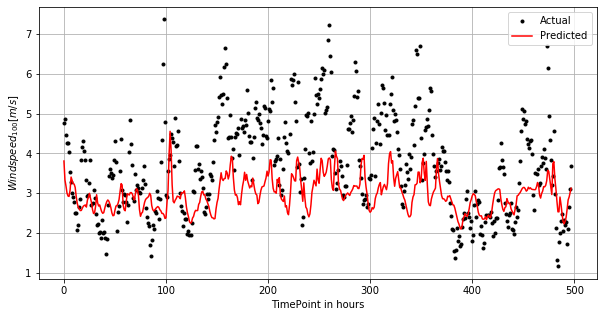

In [184]:
testScore, testPredictions, testYTrue = evaluate(dense, X_test_wiatraki, y_test_wiatraki, scaler_y, display = True, save_to='')

In [188]:
train

,t2m,d2m,msl,tp,windspeed_100,spaceGradT,spaceGradP,Day sin,Day cos,Year sin,Year cos
0,275.332254,274.286849,101918.532777,1.398094e-06,6.002099,0.666713,21.676817,-1.067931e-11,1.000000,0.005677,0.999984
1,275.114286,274.076596,101898.790426,2.019469e-06,5.802979,0.590182,23.553620,2.588190e-01,0.965926,0.006394,0.999980
2,274.602475,273.536258,101880.919674,3.650579e-06,5.867424,0.503108,21.923666,5.000000e-01,0.866025,0.007110,0.999975
3,274.942533,273.854905,101837.691774,7.068143e-06,5.996153,0.510261,26.684788,7.071068e-01,0.707107,0.007827,0.999969
4,275.290868,274.053719,101794.644996,1.141777e-05,6.222691,0.543825,30.270918,8.660254e-01,0.500000,0.008544,0.999963
...,...,...,...,...,...,...,...,...,...,...,...
70123,284.349792,281.137893,101546.254844,5.248368e-06,9.516209,0.217596,50.126239,-9.659258e-01,0.258819,0.003125,0.999995
70124,284.497001,281.261584,101575.888525,-8.673617e-19,9.703558,0.231079,49.368280,-8.660254e-01,0.500000,0.003842,0.999993
70125,284.358537,281.442320,101573.573393,2.385622e-06,10.136289,0.269798,50.918043,-7.071068e-01,0.707107,0.004559,0.999990
70126,284.420482,281.305074,101574.499446,1.700153e-04,11.058230,0.319905,55.231071,-5.000000e-01,0.866025,0.005275,0.999986


d:\Programy\Anaconda\envs\tf_gpu\lib\site-packages\matplotlib\cbook\__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'whiskers': [<matplotlib.lines.Line2D at 0x1cf10834190>,
 'caps': [<matplotlib.lines.Line2D at 0x1cf10834b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cf10834580>,
 'medians': [<matplotlib.lines.Line2D at 0x1cf10850520>,
 'fliers': [<matplotlib.lines.Line2D at 0x1cf10850850>,
 'means': []}

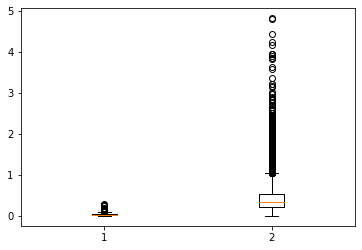

In [191]:
plt.boxplot([data_interp['spaceGradT'], train['spaceGradT']])


In [ ]:
model = Sequential([
        LSTM(24, activation='relu', input_shape=(24,13), return_sequences=True),
        LSTM(24, activation='relu', return_sequences=True),
        LSTM(24, activation='relu'),
        Dense(1)
    ])

compile_and_fit(model, X_train, y_train)

Epoch 1/20
2191/2191 [==============================] - 740s 337ms/step - loss: 0.0070
Epoch 2/20
2191/2191 [==============================] - 721s 329ms/step - loss: 0.0053
Epoch 3/20
2191/2191 [==============================] - 719s 328ms/step - loss: 0.0051
Epoch 4/20
2191/2191 [==============================] - 718s 328ms/step - loss: 0.0050
Epoch 5/20
2191/2191 [==============================] - 714s 326ms/step - loss: 0.0049
Epoch 6/20
2191/2191 [==============================] - 719s 328ms/step - loss: 0.0049
Epoch 7/20
2191/2191 [==============================] - 713s 326ms/step - loss: 0.0049
Epoch 8/20
2191/2191 [==============================] - 719s 328ms/step - loss: 0.0048
Epoch 9/20
2191/2191 [==============================] - 719s 328ms/step - loss: 0.0048
Epoch 10/20
2191/2191 [==============================] - 718s 328ms/step - loss: 0.0048
Epoch 11/20
2191/2191 [==============================] - 719s 328ms/step - loss: 0.0047
Epoch 12/20
2191/2191 [==================

Test Score: 1.5898 RMSE


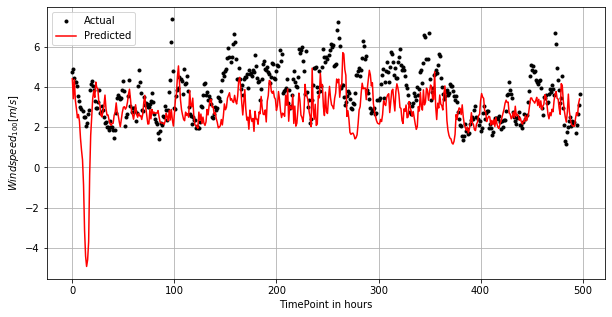

In [ ]:
testScore, testPredictions, testYTrue = evaluate(model, X_test_wiatraki, y_test_wiatraki, scaler_y, display = True, save_to='')

In [ ]:
X_test_wiatraki.shape

(498, 24, 13)

In [ ]:
y_test_wiatraki.shape

(498, 1)

In [ ]:
y_test_wiatraki[50:,:].shape

(448, 1)

In [ ]:
X_test_wiatraki[50:,:,:].shape

(448, 24, 13)

Test Score: 1.4638 RMSE


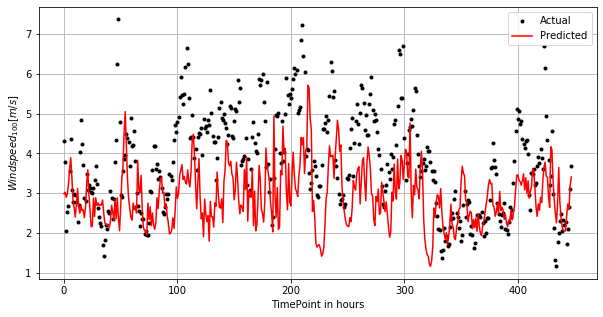

In [ ]:
# testScore, testPredictions, testYTrue = evaluate(model, X_test_wiatraki[50:,:,:], y_test_wiatraki[50:,:], scaler_y, display = True, save_to='')
# make predictions
testPredictions = model.predict(X_test_wiatraki[50:,:,:])

# invert scalling
testPredictions = scaler_y.inverse_transform(testPredictions)
testYTrue = scaler_y.inverse_transform(y_test_wiatraki[50:,:])

# calculate RMSE
testScore = sqrt(mean_squared_error(testYTrue, testPredictions))

if display:
    print('Test Score: %.4f RMSE' % (testScore))
    length = len(y_test_wiatraki[50:,:])
    # start = random.randrange(len(testYTrue)-length)
    # end = start+length
    plt.figure(figsize=[10,5])
    plt.xlabel('TimePoint in hours')
    plt.ylabel('$Windspeed_{100}[m/s]$')
    plt.grid()
    plt.plot(range(length), testYTrue,'k.')
    plt.plot(range(length),testPredictions,'r')
    plt.legend(['Actual','Predicted'])
    # plt.savefig(save_to)